In [1]:
!pip install seaborn numpy pandas matplotlib bs4 scikit-learn

In [2]:
import torch
import torch.nn as nn

import seaborn as sns
import numpy as np
import pandas as pad
import matplotlib.pyplot as plt

%matplotlib inline

In [3]:
sns.get_dataset_names()

c:\users\jan\appdata\local\programs\python\python38\lib\site-packages\seaborn\utils.py:384: GuessedAtParserWarning: No parser was explicitly specified, so I'm using the best available HTML parser for this system ("html.parser"). This usually isn't a problem, but if you run this code on another system, or in a different virtual environment, it may use a different parser and behave differently.

The code that caused this warning is on line 384 of the file c:\users\jan\appdata\local\programs\python\python38\lib\site-packages\seaborn\utils.py. To get rid of this warning, pass the additional argument 'features="html.parser"' to the BeautifulSoup constructor.

  gh_list = BeautifulSoup(http)


['anagrams',
 'anscombe',
 'attention',
 'brain_networks',
 'car_crashes',
 'diamonds',
 'dots',
 'exercise',
 'flights',
 'fmri',
 'gammas',
 'geyser',
 'iris',
 'mpg',
 'penguins',
 'planets',
 'tips',
 'titanic']

In [4]:
flight_data = sns.load_dataset("flights")
flight_data.head()

,year,month,passengers
0,1949,January,112
1,1949,February,118
2,1949,March,132
3,1949,April,129
4,1949,May,121


In [5]:
flight_data.shape

(144, 3)

In [6]:
fig_size = plt.rcParams["figure.figsize"]
fig_size[0] = 15
fig_size[1] = 5
plt.rcParams["figure.figsize"] = fig_size

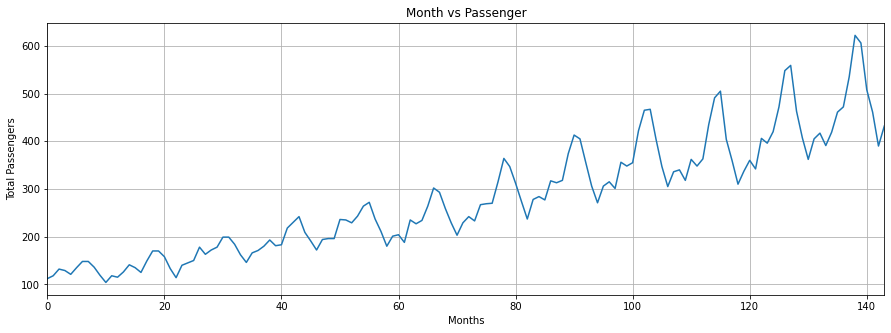

In [7]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.xlabel('Months')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])

In [8]:
flight_data.columns

Index(['year', 'month', 'passengers'], dtype='object')

In [9]:
all_data = flight_data['passengers'].values.astype(float)

In [10]:
print(all_data)

[112. 118. 132. 129. 121. 135. 148. 148. 136. 119. 104. 118. 115. 126.
 141. 135. 125. 149. 170. 170. 158. 133. 114. 140. 145. 150. 178. 163.
 172. 178. 199. 199. 184. 162. 146. 166. 171. 180. 193. 181. 183. 218.
 230. 242. 209. 191. 172. 194. 196. 196. 236. 235. 229. 243. 264. 272.
 237. 211. 180. 201. 204. 188. 235. 227. 234. 264. 302. 293. 259. 229.
 203. 229. 242. 233. 267. 269. 270. 315. 364. 347. 312. 274. 237. 278.
 284. 277. 317. 313. 318. 374. 413. 405. 355. 306. 271. 306. 315. 301.
 356. 348. 355. 422. 465. 467. 404. 347. 305. 336. 340. 318. 362. 348.
 363. 435. 491. 505. 404. 359. 310. 337. 360. 342. 406. 396. 420. 472.
 548. 559. 463. 407. 362. 405. 417. 391. 419. 461. 472. 535. 622. 606.
 508. 461. 390. 432.]


In [11]:
test_data_size = 12
train_data = all_data[:-test_data_size]
test_data = all_data[-test_data_size:]

In [12]:
print(len(train_data))
print(len(test_data))

132
12


In [13]:
print(test_data)

[417. 391. 419. 461. 472. 535. 622. 606. 508. 461. 390. 432.]


In [14]:
from sklearn.preprocessing import MinMaxScaler

scaler = MinMaxScaler(feature_range=(-1, 1))
train_data_normalized = scaler.fit_transform(train_data.reshape(-1, 1))

In [15]:
print(train_data_normalized[:5])
print(train_data_normalized[-5:])

[[-0.96483516]
 [-0.93846154]
 [-0.87692308]
 [-0.89010989]
 [-0.92527473]]
[[1.        ]
 [0.57802198]
 [0.33186813]
 [0.13406593]
 [0.32307692]]


In [16]:
train_data_normalized = torch.FloatTensor(train_data_normalized).view(-1)

In [17]:
train_window = 12

def create_inout_sequences(input_data, tw=train_window):
    inout_seq = []
    L = len(input_data)
    for i in range(L - tw):
        train_seq = input_data[i:i + tw]
        train_label = input_data[i + tw:i + tw + 1]
        inout_seq.append((train_seq, train_label))
    return inout_seq

In [18]:
train_inout_seq = create_inout_sequences(train_data_normalized)

In [19]:
train_inout_seq[:5]

[(tensor([-0.9648, -0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066,
          -0.8593, -0.9341, -1.0000, -0.9385]),
  tensor([-0.9516])),
 (tensor([-0.9385, -0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593,
          -0.9341, -1.0000, -0.9385, -0.9516]),
  tensor([-0.9033])),
 (tensor([-0.8769, -0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341,
          -1.0000, -0.9385, -0.9516, -0.9033]),
  tensor([-0.8374])),
 (tensor([-0.8901, -0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000,
          -0.9385, -0.9516, -0.9033, -0.8374]),
  tensor([-0.8637])),
 (tensor([-0.9253, -0.8637, -0.8066, -0.8066, -0.8593, -0.9341, -1.0000, -0.9385,
          -0.9516, -0.9033, -0.8374, -0.8637]),
  tensor([-0.9077]))]

In [20]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))
    
    def forward(self, input_seq):
        model_input_seq = input_seq.view(len(input_seq), 1, -1)
        
        lstm_out, self.hidden_cell = self.lstm(model_input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        
        return predictions[-1]

In [59]:
device = 'cuda'

model = LSTM().to(device)
loss_function = nn.MSELoss().to(device)
optimizer = torch.optim.Adam(model.parameters(), lr=0.001)

In [60]:
print(model)

LSTM(
  (lstm): LSTM(1, 100)
  (linear): Linear(in_features=100, out_features=1, bias=True)
)


In [61]:
epochs = 10000

for i in range(epochs):
    for seq, labels in train_inout_seq:
        optimizer.zero_grad()
        model.hidden_cell = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                        torch.zeros(1, 1, model.hidden_layer_size).to(device))

        y_pred = model(seq.to(device))

        single_loss = loss_function(y_pred.cpu(), labels)
        single_loss.backward()
        optimizer.step()

    if i%25 == 1:
        print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')

epoch:   1 loss: 0.00182079
epoch:  26 loss: 0.00658555
epoch:  51 loss: 0.00015273
epoch:  76 loss: 0.01880293
epoch: 101 loss: 0.01567977
epoch: 126 loss: 0.00012998
epoch: 151 loss: 0.00053022
epoch: 176 loss: 0.03167699
epoch: 201 loss: 0.00063273
epoch: 226 loss: 0.00124417
epoch: 251 loss: 0.00120420
epoch: 276 loss: 0.00011916
epoch: 301 loss: 0.00003387
epoch: 326 loss: 0.00000760
epoch: 351 loss: 0.00131731
epoch: 376 loss: 0.00010770
epoch: 401 loss: 0.00098291
epoch: 426 loss: 0.00049966
epoch: 451 loss: 0.00008964
epoch: 476 loss: 0.00005655
epoch: 501 loss: 0.00054649
epoch: 526 loss: 0.00021275
epoch: 551 loss: 0.00001445
epoch: 576 loss: 0.00007991
epoch: 601 loss: 0.00000067
epoch: 626 loss: 0.00000483
epoch: 651 loss: 0.00007551
epoch: 676 loss: 0.00026457
epoch: 701 loss: 0.00041967
epoch: 726 loss: 0.00001569
epoch: 751 loss: 0.00002126
epoch: 776 loss: 0.00003135
epoch: 801 loss: 0.00070220
epoch: 826 loss: 0.00002025
epoch: 851 loss: 0.00006447
epoch: 876 loss: 0.0

In [68]:
fut_pred = 12

test_inputs = train_data_normalized[-train_window:].tolist()
print(test_inputs)

[0.12527473270893097, 0.04615384712815285, 0.3274725377559662, 0.2835164964199066, 0.3890109956264496, 0.6175824403762817, 0.9516483545303345, 1.0, 0.5780220031738281, 0.33186814188957214, 0.13406594097614288, 0.32307693362236023]


In [69]:
model.eval()

for i in range(fut_pred):
    seq = torch.FloatTensor(test_inputs[-train_window:]).to(device)
    with torch.no_grad():
        model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                        torch.zeros(1, 1, model.hidden_layer_size).to(device))
        test_inputs.append(model(seq).item())

In [70]:
test_inputs[fut_pred:]

[0.4850635230541229,
 0.16486264765262604,
 0.1630132794380188,
 0.2708468735218048,
 0.47786378860473633,
 0.7284061908721924,
 1.042277455329895,
 0.7232682704925537,
 0.5861715078353882,
 0.7164361476898193,
 1.1967566013336182,
 1.1478300094604492]

In [71]:
actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
print(actual_predictions)

[[441.85195149]
 [369.00625234]
 [368.58552107]
 [393.11766373]
 [440.21401191]
 [497.21240842]
 [568.61812109]
 [496.04353154]
 [464.85401803]
 [494.4892236 ]
 [603.7621268 ]
 [592.63132715]]


In [72]:
x = np.arange(132, 144, 1)
print(x)

[132 133 134 135 136 137 138 139 140 141 142 143]


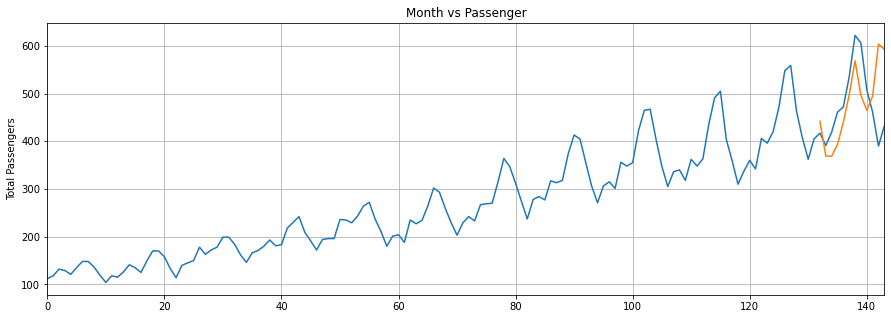

In [73]:
plt.title('Month vs Passenger')
plt.ylabel('Total Passengers')
plt.grid(True)
plt.autoscale(axis='x', tight=True)
plt.plot(flight_data['passengers'])
plt.plot(x,actual_predictions)
plt.show()

In [80]:
class LSTM(nn.Module):
    def __init__(self, input_size=1, hidden_layer_size=100, output_size=1):
        super().__init__()
        
        self.hidden_layer_size = hidden_layer_size
        self.lstm = nn.LSTM(input_size, hidden_layer_size)
        self.linear = nn.Linear(hidden_layer_size, output_size)
        
        self.hidden_cell = (torch.zeros(1, 1, self.hidden_layer_size),
                            torch.zeros(1, 1, self.hidden_layer_size))
    
    def forward(self, input_seq):
        model_input_seq = input_seq.view(len(input_seq), 1, -1)
        
        lstm_out, self.hidden_cell = self.lstm(model_input_seq, self.hidden_cell)
        predictions = self.linear(lstm_out.view(len(input_seq), -1))
        
        return predictions[-1]

def build_model(epochs=100):
    device = 'cuda'

    model = LSTM().to(device)
    loss_function = nn.MSELoss().to(device)
    optimizer = torch.optim.Adam(model.parameters(), lr=0.001)
    batch_size = 8

    for i in range(epochs):
        for ix in range(0, len(train_inout_seq), batch_size):
            
            
            optimizer.zero_grad()
            model.hidden_cell = (torch.zeros(batch_size, 1, model.hidden_layer_size).to(device),
                            torch.zeros(batch_size, 1, model.hidden_layer_size).to(device))
            
            for sub_ix in range(batch_size):
                
            seq, labels = train_inout_seq[ix:ix+batch_size]
            y_pred = model(seq.to(device))

            single_loss = loss_function(y_pred.cpu(), labels)
            single_loss.backward()
            optimizer.step()

        if i%25 == 1:
            print(f'epoch: {i:3} loss: {single_loss.item():10.8f}')

    print(f'epoch: {i:3} loss: {single_loss.item():10.10f}')
    
    return model


def validate_model(model):
    fut_pred = 12

    test_inputs = train_data_normalized[-train_window:].tolist()
    print(test_inputs)
    
    model.eval()

    for i in range(fut_pred):
        seq = torch.FloatTensor(test_inputs[-train_window:]).to(device)
        with torch.no_grad():
            model.hidden = (torch.zeros(1, 1, model.hidden_layer_size).to(device),
                            torch.zeros(1, 1, model.hidden_layer_size).to(device))
            test_inputs.append(model(seq).item())
    
    test_inputs[fut_pred:]
    
    actual_predictions = scaler.inverse_transform(np.array(test_inputs[train_window:] ).reshape(-1, 1))
    print(actual_predictions)
    
    x = np.arange(132, 144, 1)
    print(x)
    
    plt.title('Month vs Passenger')
    plt.ylabel('Total Passengers')
    plt.grid(True)
    plt.autoscale(axis='x', tight=True)
    plt.plot(flight_data['passengers'])
    plt.plot(x,actual_predictions)
    plt.show()

model = build_model()
validate_model(model)

ValueError: too many values to unpack (expected 2)

In [79]:
[*range(0, 50, 8)]

[0, 8, 16, 24, 32, 40, 48]